<a href="https://colab.research.google.com/github/luizhsalazar/pln-deep-learning/blob/master/Deep_Learning_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Documentação**

https://pytorch.org/docs/stable/tensors.html
https://pytorch.org/docs/stable/torch.html

In [1]:
import torch

# Gera tensor com dimensões 2x2x3
tns = torch.randn(2,2,3)

print(tns.size())

# Achatar o tensor
tns = tns.view(-1)
print(tns)

# Mantem a primeira dimensão e achata o resto
tns = tns.view(tns.size(0), -1)
print(tns)


torch.Size([2, 2, 3])
tensor([-1.2098,  1.1263, -0.1131, -0.0427,  0.7544, -1.1532, -0.8049,  0.3613,
        -0.5826,  0.9810,  0.5330, -0.0553])
tensor([[-1.2098],
        [ 1.1263],
        [-0.1131],
        [-0.0427],
        [ 0.7544],
        [-1.1532],
        [-0.8049],
        [ 0.3613],
        [-0.5826],
        [ 0.9810],
        [ 0.5330],
        [-0.0553]])


In [2]:
# Utilização de GPU

import torch

tns = torch.randn(10)
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

tns = tns.to(device)

print(device)
print(tns)

cpu
tensor([-0.3243,  0.7917,  0.1073, -0.3047, -1.6498, -1.7106,  0.5272, -0.1320,
         1.3230,  0.0432])


Estrutura do **Perceptron** - **Classificação Linear **

Função da reta: **f(x) = ax + by + c**

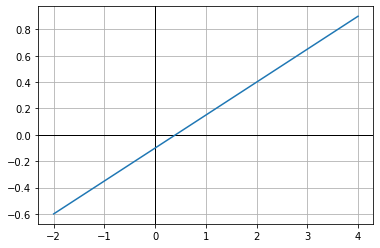

In [3]:
import numpy as np
import matplotlib.pyplot as plt

a = -1
b = 4
c = 0.4

def plotLine(a, b, c):
  # Gera conjunto de valores para intervalo de x de -2 até 4, com 50 valores
  x = np.linspace(-2, 4, 50)
  #print(x)

  # Isolando y da f(x) => y = (-a*x - c)/b
  y = (-a*x - c)/b

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y)
  plt.grid(True)

plotLine(a, b, c)

0.00
1.80
-4.20


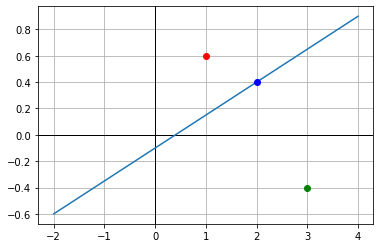

In [4]:
# Pontos sobre a reta

p1 = (2, 0.4) # Ponto sobre a reta
p2 = (1, 0.6) # ponto acima da reta
p3 = (3, -0.4) # ponto abaixo da reta

plotLine(a, b, c)
plt.plot(p1[0], p1[1], color='b', marker='o')
plt.plot(p2[0], p2[1], color='r', marker='o')
plt.plot(p3[0], p3[1], color='g', marker='o')

# Aplicando o valores dos pontos na equação da reta
ret1 = a*p1[0] + b*p1[1] + c
print("%.2f" % ret1)

ret2 = a*p2[0] + b*p2[1] + c
print("%.2f" % ret2)

ret3 = a*p3[0] + b*p3[1] + c
print("%.2f" % ret3)

Logo, a reta serve como uma fronteira de decisão entre duas regiões no espaço, ou seja, funciona como um **classificador linear**.
O perceptron consegue solucionar problemas representáveis através de uma reta, ou seja, modelos lineares.

---

No contexto de redes neurais (perceptron),  é feita a generalização da função da reta:

> w1*x1 + w2*x2 + b

em que **w** são os pesos (*weights*), **x** são as coordenadas dos pontos/dimensões (*a, b, c, etc*) na reta e o **b** é o viés (*bias*) da função - deslocamento da reta no espaço sem alteração da angulação da reta.


Com a abstração da função em termos de somatório, a função do perceptron fica exatamente a função de uma reta (somatório do produto de **w** e **x** mais um **bias**. Logo, o **perceptron é definido por um modelo linear** e apresenta uma série de limitações por causa disto.


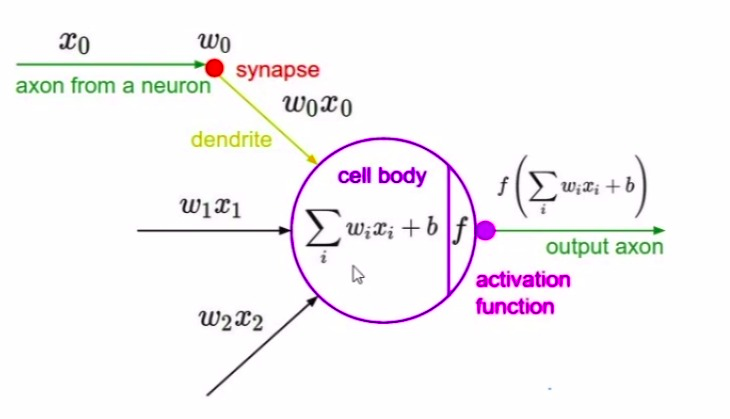


# Gerando modelo linear na "mão" com base numa reta

* Lib do SKLearn para gerar dados aleatórios: 
https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py

1


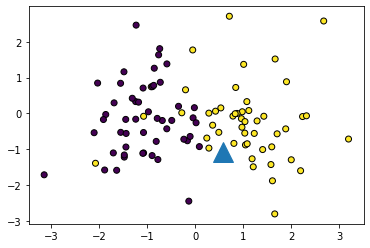

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(50)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolor='k')

p = X[45]
print(Y[45])
plt.plot(p[0], p[1], marker='^', markersize=20)


-4


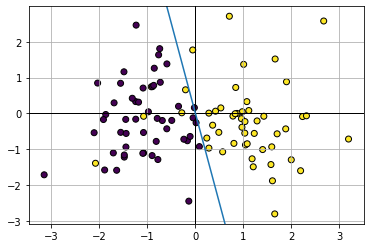

In [6]:
def plotmodel(w1, w2, b):

  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolor='k')

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2, 4, 50)
  y = (-w1*x - b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5
w2 = 1
b  = 0

plotmodel(w1, w2, b)

# Gerar ponto aleatório para saber qual valor (negativo ou positivo) pertence a qual lado da reta
p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

# Assim, valores negativos pertencem ao lado esquerdo da reta (classe azul)
# Logo, posso montar uma função de classificação com base nesse padrão.

1 yellow


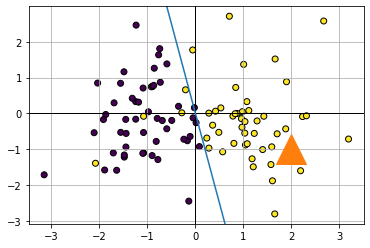

In [7]:
def classify(ponto, w1, w2, b):
  # calcula a equação da reta para o ponto recebido por parâmetro
  ret = w1 * ponto[0] + w2 * ponto[1] + b
  
  # define a qual reta pertence
  if (ret >= 0):
    return 1, 'yellow'
  else:
    return 0, 'blue'

# teste de classificação com um ponto aleatório (predict)
p = (2, -1)
classe, cor = classify(p, w1, w2, b)
print(classe, cor)

plotmodel(w1, w2, b)
plt.plot(p[0], p[1], marker='^', markersize=30)


### Cálculo de acurácia do modelo

In [8]:
acertos = 0  
total_amostra = len(X)
for k in range(total_amostra):
  classe, _ = classify(X[k], w1, w2, b)
  if classe == Y[k]:
    acertos += 1

print("Acurácia: {0}".format(100* (acertos/total_amostra)))

Acurácia: 94.0


O perceptron é a unidade fundamental de redes neurais. Ele recebe d conexões de entrada e produz um único valor de saída (transformação linear).

# Utilizando PyTorch

In [9]:
import torch
from torch import nn

In [10]:
torch.manual_seed(42)

perceptron = nn.Linear(in_features=3, out_features=1)

# weights e bias são inicializados aleatoriamente pelo pytorch
for nome, tensor in perceptron.named_parameters():
  print(nome, tensor.data)

perceptron.weight.data

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])


tensor([[ 0.4414,  0.4792, -0.1353]])

In [11]:
# Equação: w1*x1 + w2*x2 + w3*x3 + b = 0
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):
  
  w1, w2, w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()
  
  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)

  X1, X2 = np.meshgrid(X1,X2)

  X3 = (b - w1*X1 - w2*X2) / w3
  
  fig = plt.figure(figsize=(10, 8))

  ax = fig.gca(projection='3d')
  ax.view_init(azim=180)
  
  ax.plot_surface(X1, X2, X3, cmap='plasma')

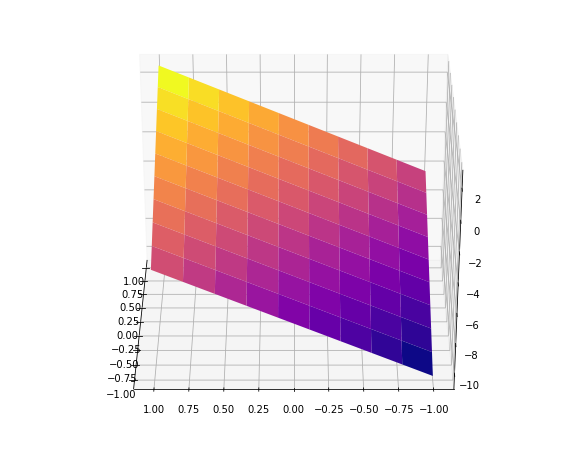

In [13]:
plot3d(perceptron)

#Forward

O fluxo da informação de entrada através da rede recebe o nome de forward, já que a informação é passada para a frente. Para isso, basta realizar uma chamada de função com a variável onde instaciamos a camada Linear.

tensor([0.7391], grad_fn=<AddBackward0>)


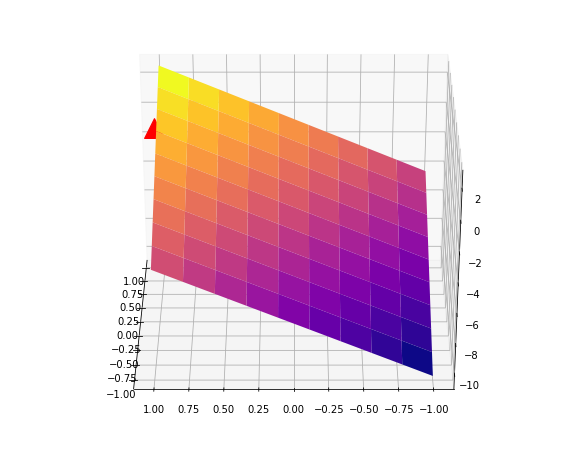

In [14]:
# Criação de um ponto no espaço
X = torch.Tensor([0, 1, 2])
# Chamada da função do perceptron com retorno de Y
y = perceptron(X)

print(y)

plot3d(perceptron)
plt.plot([X[0]], [X[1]], [X[2]], color='r', marker='^', markersize=20)

# Função de Ativação

O papel da função de ativação é definir se o neurônio vai ativar e qual a sua força de ativação. Decisões binárias {0, 1} são representadas por uma **função limiar**. Ela está limitada a esses dois estados {0, 1} como um interruptor.

Para que o neurônio possa ativar com diferentes forças, existem funções como a **sigmóide**. Ela também define um intervalo [0, 1] mas pode assumir qualquer valor dentro desse intervalo. Neste caso, este tipo de função permite que se saiba a "certeza" do perceptron.

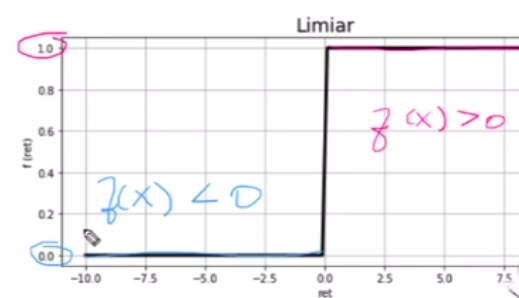

# Funções de ativação mais populares

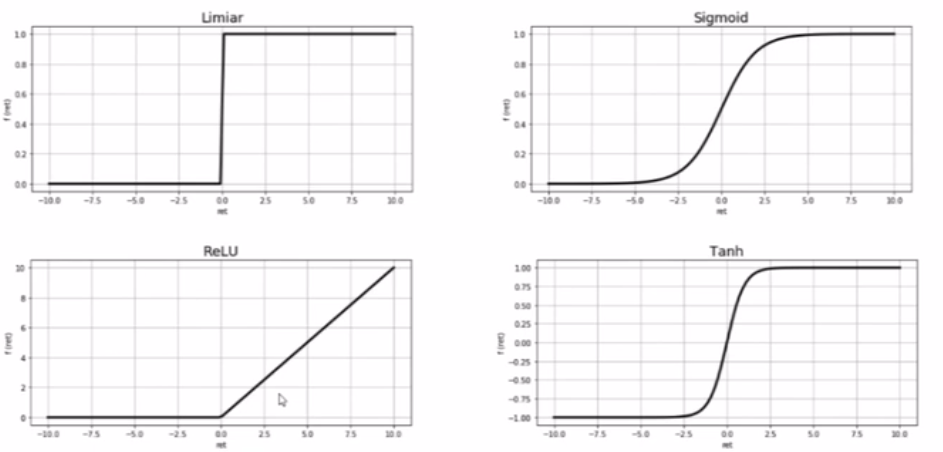

# Funções de ativação no PyTorch

-2.8


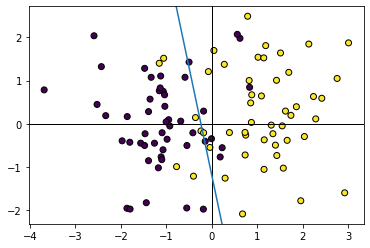

In [15]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

def plotmodel(w1, w2, b):
  
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  
w1 = 5 #a
w2 = 1  #b
b  = 1.2  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

In [16]:
# A ideia é reproduzir o mesmo exemplo que foi feito na "mão" com a função da reta.

perceptron = nn.Linear(2, 1)
activation = nn.Sigmoid()

print(perceptron.weight.data)
print(perceptron.bias.data)

perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron.bias   = nn.Parameter(torch.Tensor([b]))

print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[-0.1549,  0.1427]])
tensor([-0.3443])
tensor([[5., 1.]])
tensor([1.2000])


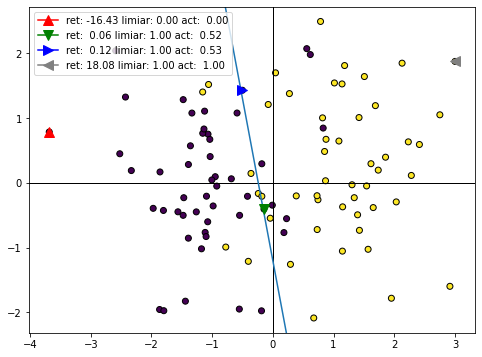

In [17]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)
for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])
  
  ret = perceptron(x)
  act = activation(ret)
  
  act_limiar = 0 if ret.data < 0 else 1
  
  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)
  
plt.legend()
plt.show()

# Redes Neurais

Treinamento de múltiplos perceptrons ao mesmo tempo, especializando cada um em um objetivo diferente (determinar se é gato, cachorro ou pássaro). Para problema de classificação com múltiplas categorias, a função **softmax** é aplicada à saída da camada de output. Ela transforma os scores individuais dos perceptrons em uma **distribuição de probabiidades** (somatório dos valores é igual a 1). Na prática, as *out_features* do modelo linear no PyTorch é a quantidade de neurônios que o modelo deve ter.

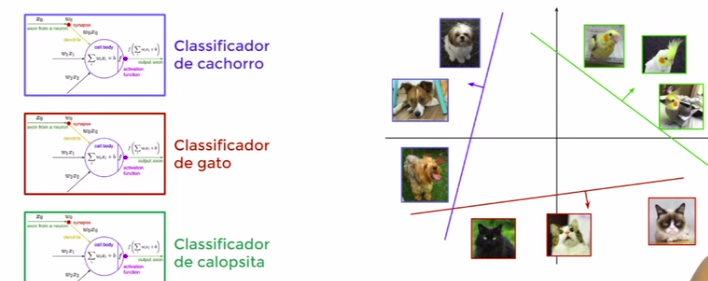

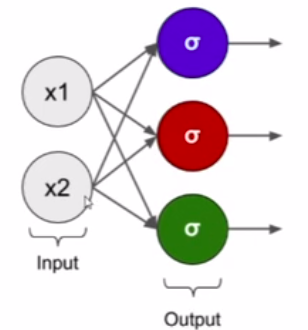

# Múltiplas camadas de perceptron (*Multi Layer Perceptron* - MLP)

A grande maioria dos problemas do mundo real possuem distribuições complexas e não são solucionáveis por transformações lineares - problemas não linearmente separáveis (como o problema clássico do XOR).

Para solucionar problemas não lineares, Geoffrey Hintos criou o algoritmo de **backpropagation**. O algoritmo consiste na propagação dos erros para os neurônios e insere funções não lineares (ReLU, TANH, etc) nas camadas intermediárias.

Descobriu-se que uma arquitetura hierárquica (em camadas) consegue aproximar funções mais complexas. As características aprendidas nas camadas intermediárias são linearmente separáveis. O potencial do aprendizado hierárquico de características deu origem ao que conhece-se hoje como **deep learning**.

**Teorema da Aproximação Universal**: "uma rede neural feed-forward com apenas uma camada (escondida) **é suficiente pra representar qualquer função**, mas a camada pode ser inviavelmente grande e pode falhar em aprender e generalizar corretamente."

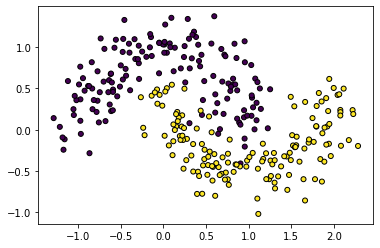

In [18]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', 
 c=Y1, s=25, edgecolor='k')

# O módulo nn.Sequential
É um container onde se pode colocar múltiplos módulos. Ao realizar um forward em um objeto Sequential ele aplicará sequencialmente os módulos nele contidas para gerar uma saída. É o jeito mais simples e serve apenas para testes iniciais na rede.

In [21]:
import torch
from torch import nn # neural networks
from torchsummary import summary

input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size), # hidden (escondida)
                    nn.ReLU(),   # ativação não linear
                    nn.Linear(in_features=hidden_size, out_features=output_size)) # output (saída)
print(net)

# Visualizando a saída com summary
summary(net, input_size=(1, input_size))

# Forward
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred   = net(tensor)
print(pred.size())

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
(300, 2)
torch.Size([300, 1])


# Classe nn.Module
A forma mais organizada de definir modelos em PyTorch é implementando uma classe nos moldes da classe nn.Module. Modelos maiores e com funcionalidades mais complexas, são mais fáceis de implementar e realizar manutenções dessa forma.

Funções obrigatórias do nn.Module.
* __init()__: definição de hiperparâmetros e instância do modelo
* forward(): Fluxo da entrada para produzir uma saída

In [22]:
class NeuralNetwork(nn.Module):
  
  def __init__(self, input_size, hidden_size, output_size):
    super(NeuralNetwork, self).__init__()
    
    # Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)
    
  def forward(self, X):
    
    # Gerar uma saída a partir do X
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)
    
    return output

In [24]:
input_size = 2
hidden_size = 8
output_size = 1

net = NeuralNetwork(input_size,hidden_size, output_size)  ## O método __init__()
print(net)

# Forward
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred   = net(tensor)
print(pred.size())

NeuralNetwork(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)
(300, 2)
torch.Size([300, 1])


In [28]:
# Utilizando GPU (deve-se habilitar no notebook previamente)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')  
print(device)

input_size = 2
hidden_size = 8
output_size = 1

net = NeuralNetwork(input_size,hidden_size, output_size)  ## O método __init__()
net = net.to(device)
print(net)

cpu
NeuralNetwork(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)
